In [3]:
!pip install xgboost

  Using cached xgboost-3.0.3-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-3.0.3-py3-none-win_amd64.whl (149.9 MB)


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

df = pd.read_csv('forest_dataset.csv', header=None)

feature_names = [
    'Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
    'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
    'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
    'Horizontal_Distance_To_Fire_Points'
]

wilderness_areas = ['Wilderness_Area'+str(i) for i in range(1,5)]

soil_types = ['Soil_Type'+str(i) for i in range(1,41)]

column_names = feature_names + wilderness_areas + soil_types + ['Cover_Type']

df.columns = column_names

print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 55 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Elevation                           10001 non-null  int64
 1   Aspect                              10001 non-null  int64
 2   Slope                               10001 non-null  int64
 3   Horizontal_Distance_To_Hydrology    10001 non-null  int64
 4   Vertical_Distance_To_Hydrology      10001 non-null  int64
 5   Horizontal_Distance_To_Roadways     10001 non-null  int64
 6   Hillshade_9am                       10001 non-null  int64
 7   Hillshade_Noon                      10001 non-null  int64
 8   Hillshade_3pm                       10001 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  10001 non-null  int64
 10  Wilderness_Area1                    10001 non-null  int64
 11  Wilderness_Area2                    10001 non-null  int64
 12  Wild

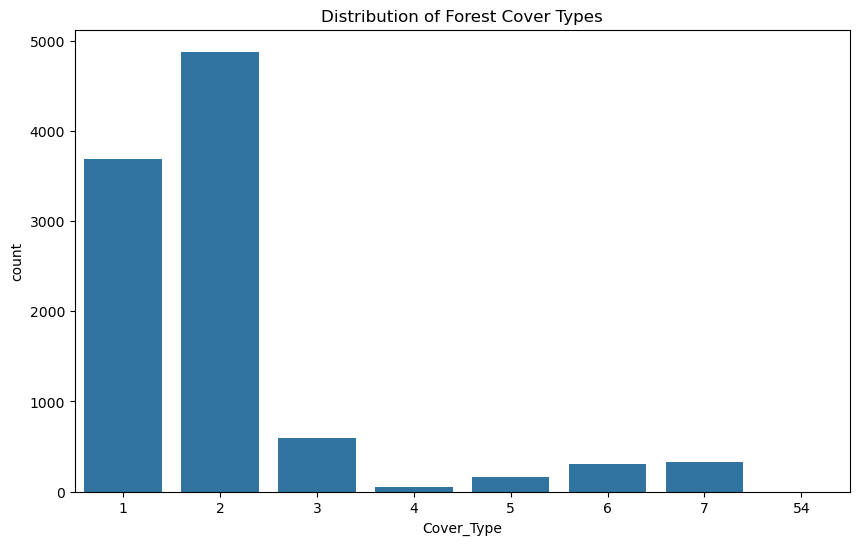

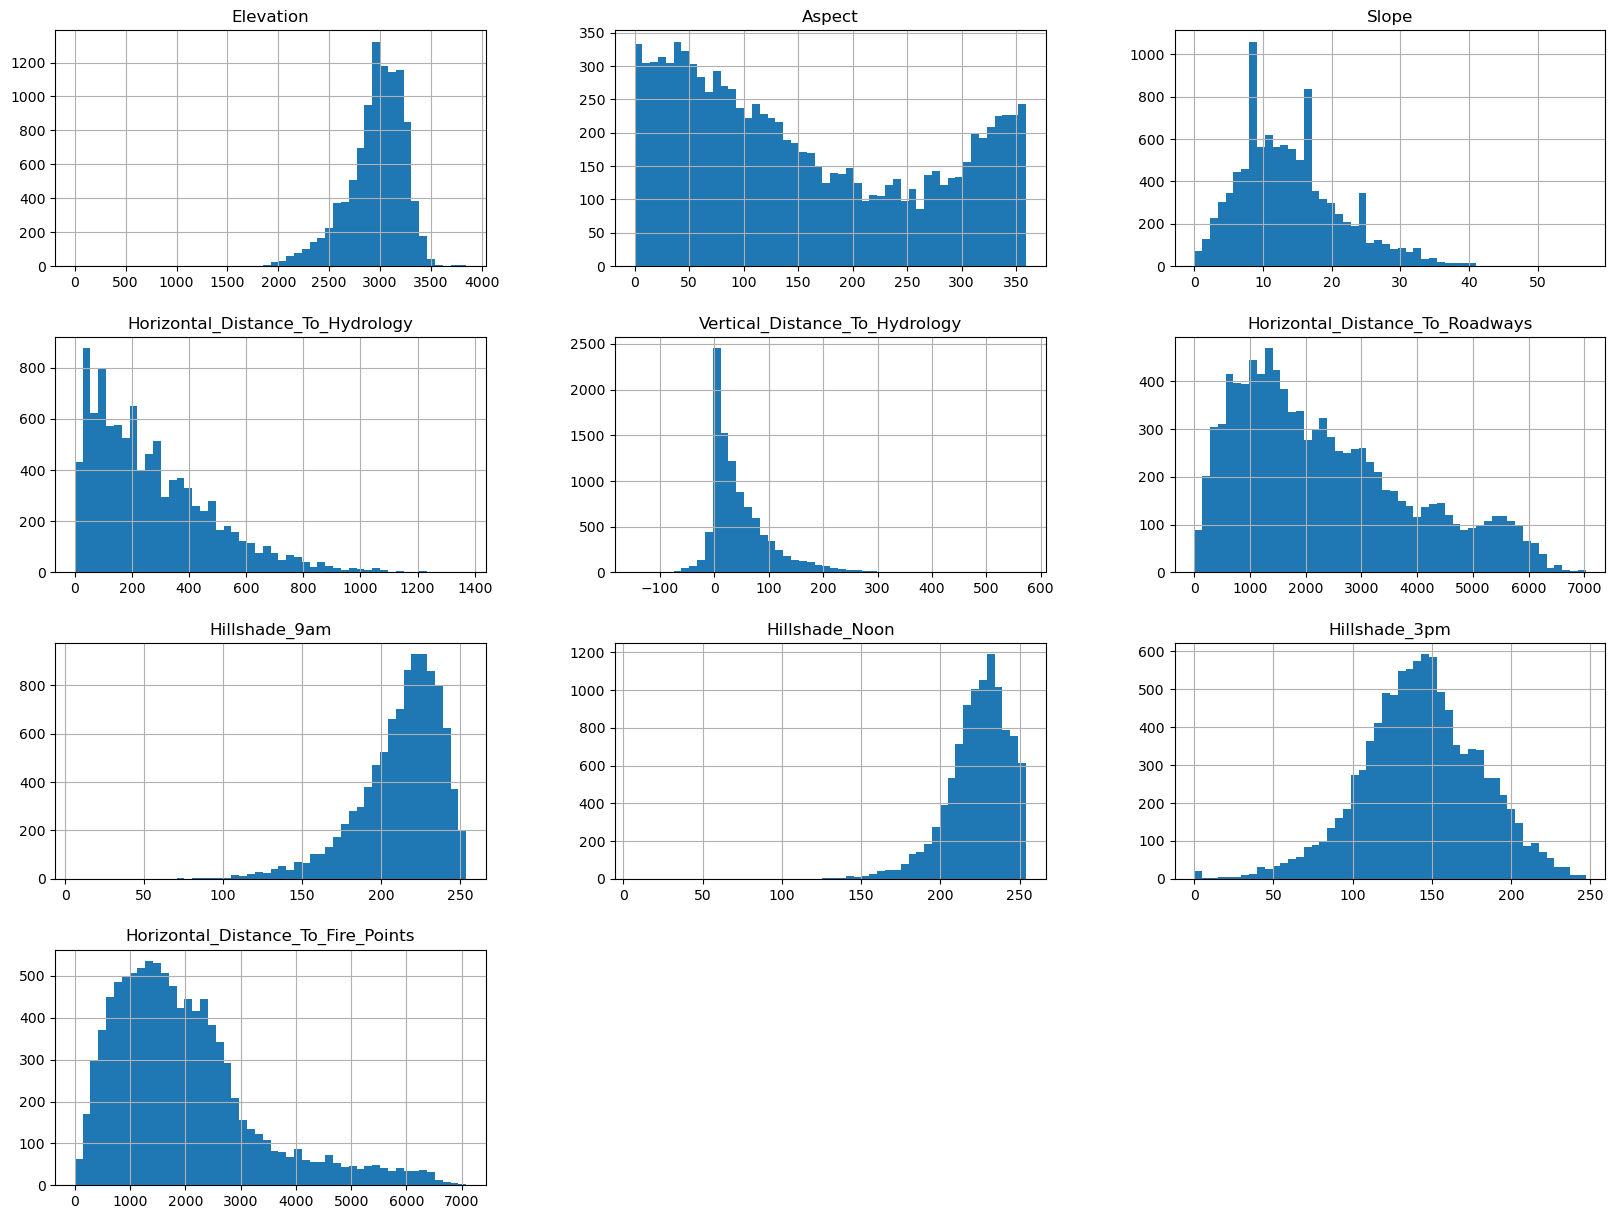

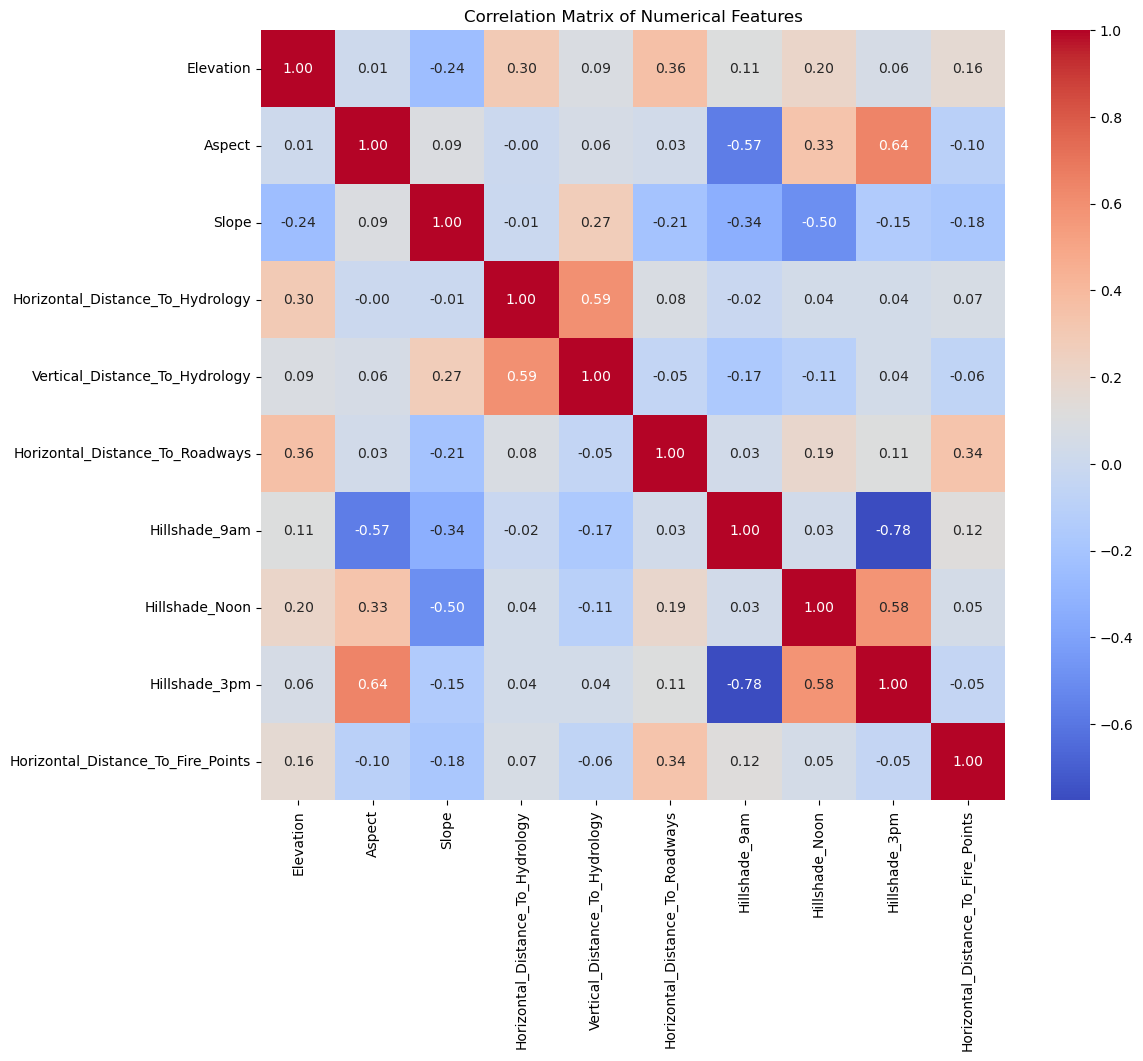

In [7]:
plt.figure(figsize=(10,6))
sns.countplot(x='Cover_Type', data=df)
plt.title('Distribution of Forest Cover Types')
plt.show()

numerical_features = feature_names
df[numerical_features].hist(bins=50, figsize=(20,15))
plt.show()

plt.figure(figsize=(12,10))
corr = df[numerical_features].corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('forest_dataset.csv', header=None)

feature_names = [
    'Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
    'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
    'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
    'Horizontal_Distance_To_Fire_Points'
]
wilderness_areas = ['Wilderness_Area'+str(i) for i in range(1,5)]
soil_types = ['Soil_Type'+str(i) for i in range(1,41)]
column_names = feature_names + wilderness_areas + soil_types + ['Cover_Type']

df.columns = column_names

print("Class distribution before processing:")
print(df['Cover_Type'].value_counts())

value_counts = df['Cover_Type'].value_counts()
to_keep = value_counts[value_counts >= 2].index
df = df[df['Cover_Type'].isin(to_keep)]

X = df.drop('Cover_Type', axis=1)
y = df['Cover_Type']

print("\nClass distribution after processing:")
print(y.value_counts())

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3, 
    random_state=42,
    stratify=y
)

scaler = StandardScaler()
numerical_features = feature_names  # From the loaded data above
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

print("\nData shapes:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

Class distribution before processing:
Cover_Type
2     4876
1     3690
3      590
7      329
6      302
5      162
4       51
54       1
Name: count, dtype: int64

Class distribution after processing:
Cover_Type
2    4876
1    3690
3     590
7     329
6     302
5     162
4      51
Name: count, dtype: int64

Data shapes:
X_train: (7000, 54)
X_test: (3000, 54)
y_train: (7000,)
y_test: (3000,)


Random Forest Classifier:
              precision    recall  f1-score   support

           1       0.80      0.79      0.79      1107
           2       0.80      0.86      0.83      1463
           3       0.76      0.82      0.79       177
           4       0.67      0.27      0.38        15
           5       0.82      0.18      0.30        49
           6       0.69      0.44      0.54        90
           7       0.92      0.71      0.80        99

    accuracy                           0.80      3000
   macro avg       0.78      0.58      0.63      3000
weighted avg       0.80      0.80      0.80      3000

Accuracy: 0.8013333333333333


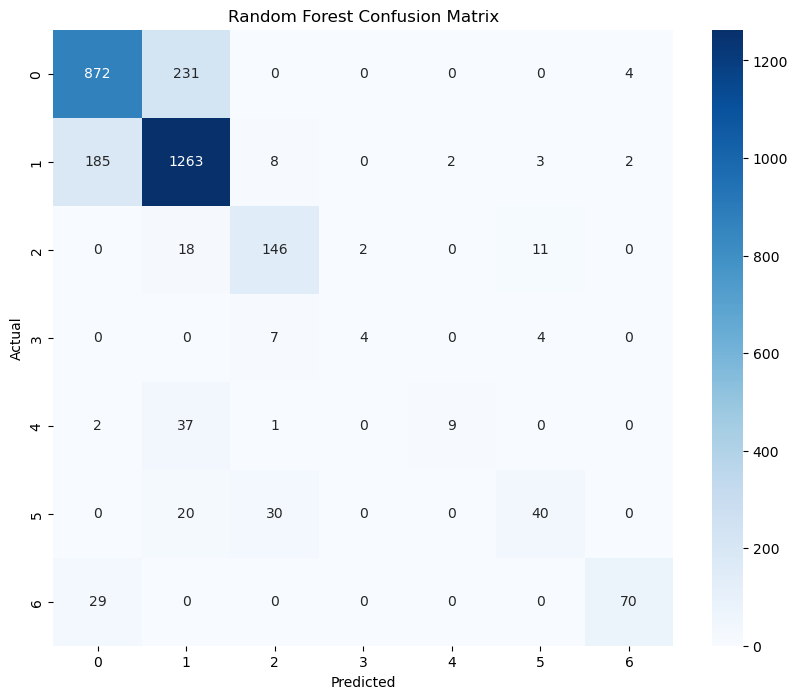

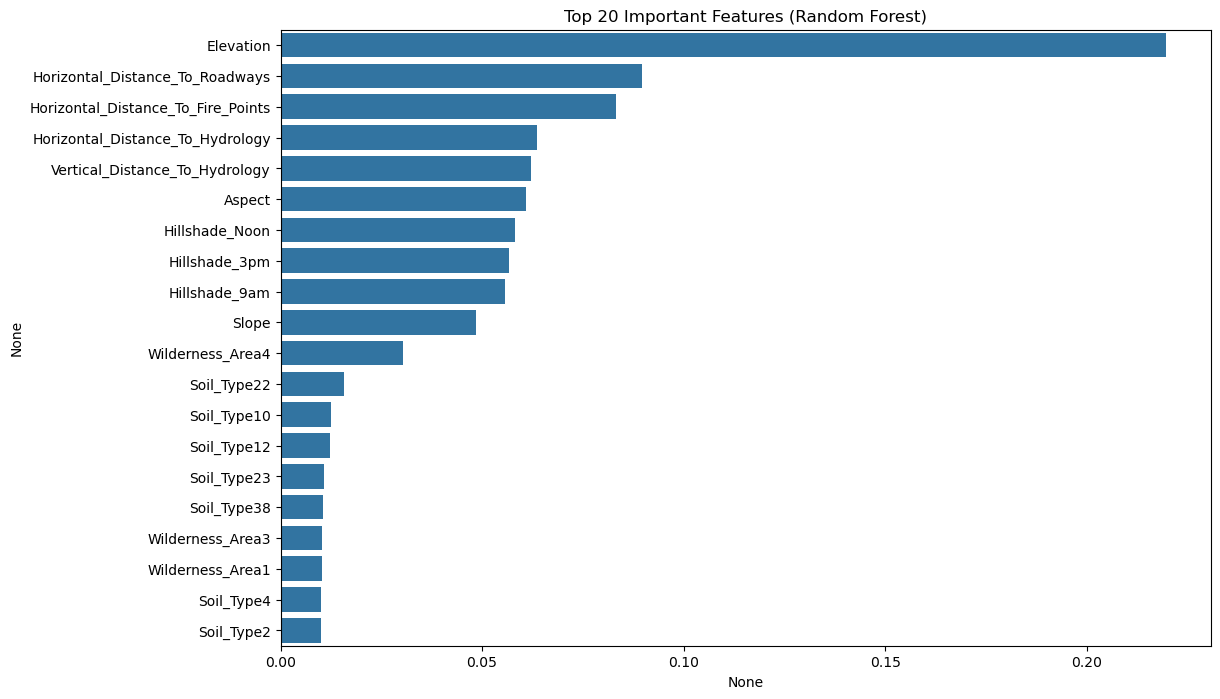

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest Classifier:")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), 
            annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

feature_imp_rf = pd.Series(rf.feature_importances_, 
                          index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(12,8))
sns.barplot(x=feature_imp_rf[:20], y=feature_imp_rf.index[:20])
plt.title('Top 20 Important Features (Random Forest)')
plt.show()

Checking variables...
X_train exists: True
y_train exists: True

XGBoost Classifier:
              precision    recall  f1-score   support

           0       0.79      0.79      0.79      1107
           1       0.81      0.83      0.82      1463
           2       0.74      0.79      0.77       177
           3       0.70      0.47      0.56        15
           4       0.75      0.24      0.37        49
           5       0.63      0.53      0.58        90
           6       0.91      0.76      0.83        99

    accuracy                           0.79      3000
   macro avg       0.76      0.63      0.67      3000
weighted avg       0.79      0.79      0.79      3000

Accuracy: 0.793


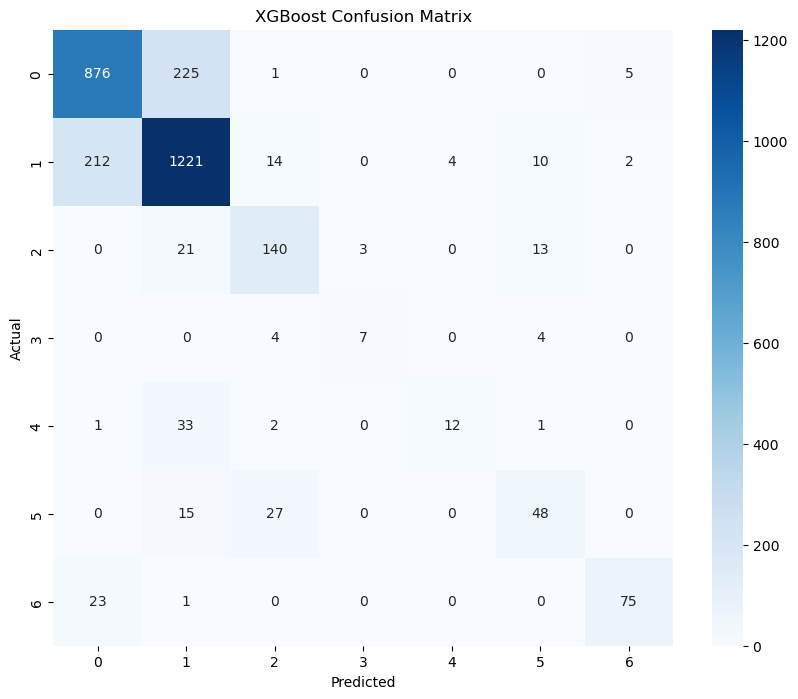

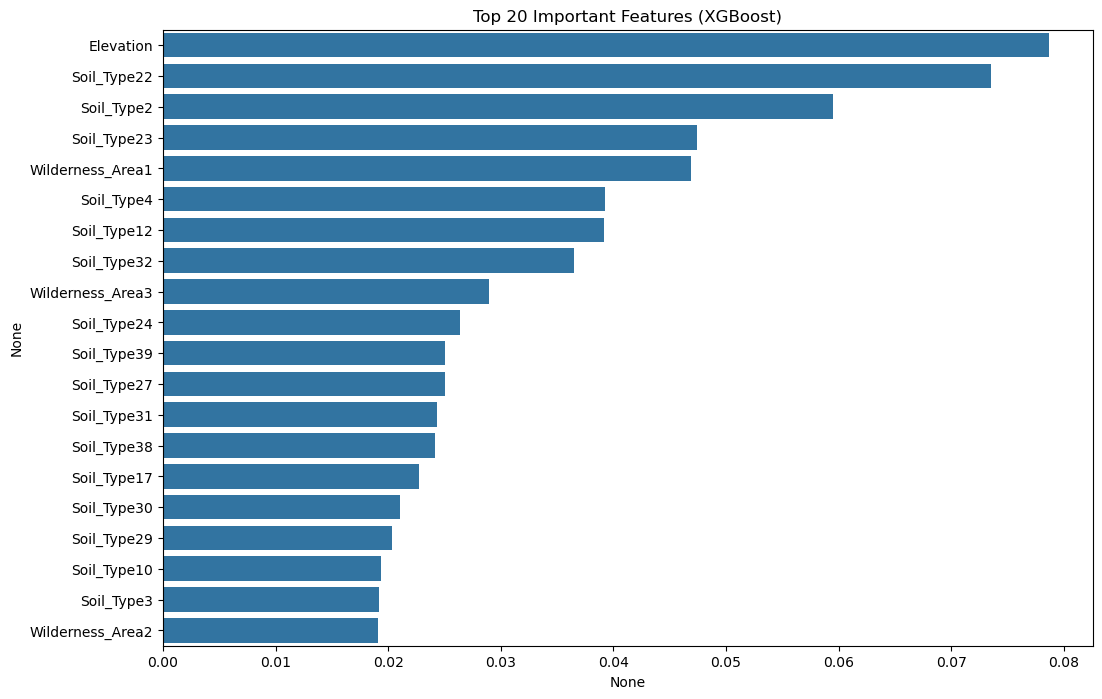

In [15]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

print("Checking variables...")
print("X_train exists:", 'X_train' in locals())
print("y_train exists:", 'y_train' in locals())

y_train_remapped = y_train - 1
y_test_remapped = y_test - 1

xgb = XGBClassifier(
    n_estimators=100, 
    random_state=42, 
    eval_metric='mlogloss',
    use_label_encoder=False,
    objective='multi:softmax',
    num_class=len(np.unique(y_train_remapped))
)
xgb.fit(X_train, y_train_remapped)

y_pred_xgb = xgb.predict(X_test)

print("\nXGBoost Classifier:")
print(classification_report(y_test_remapped, y_pred_xgb))
print("Accuracy:", accuracy_score(y_test_remapped, y_pred_xgb))

plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test_remapped, y_pred_xgb), 
            annot=True, fmt='d', cmap='Blues')
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

feature_imp_xgb = pd.Series(xgb.feature_importances_, 
                           index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_imp_xgb[:20], y=feature_imp_xgb.index[:20])
plt.title('Top 20 Important Features (XGBoost)')
plt.show()

Checking required variables...
y_test exists: True
y_pred_rf exists: True
y_pred_xgb exists: True
feature_imp_rf exists: True
feature_imp_xgb exists: True

Model Performance Comparison:
Random Forest Accuracy: 0.8013333333333333
XGBoost Accuracy: 0.793


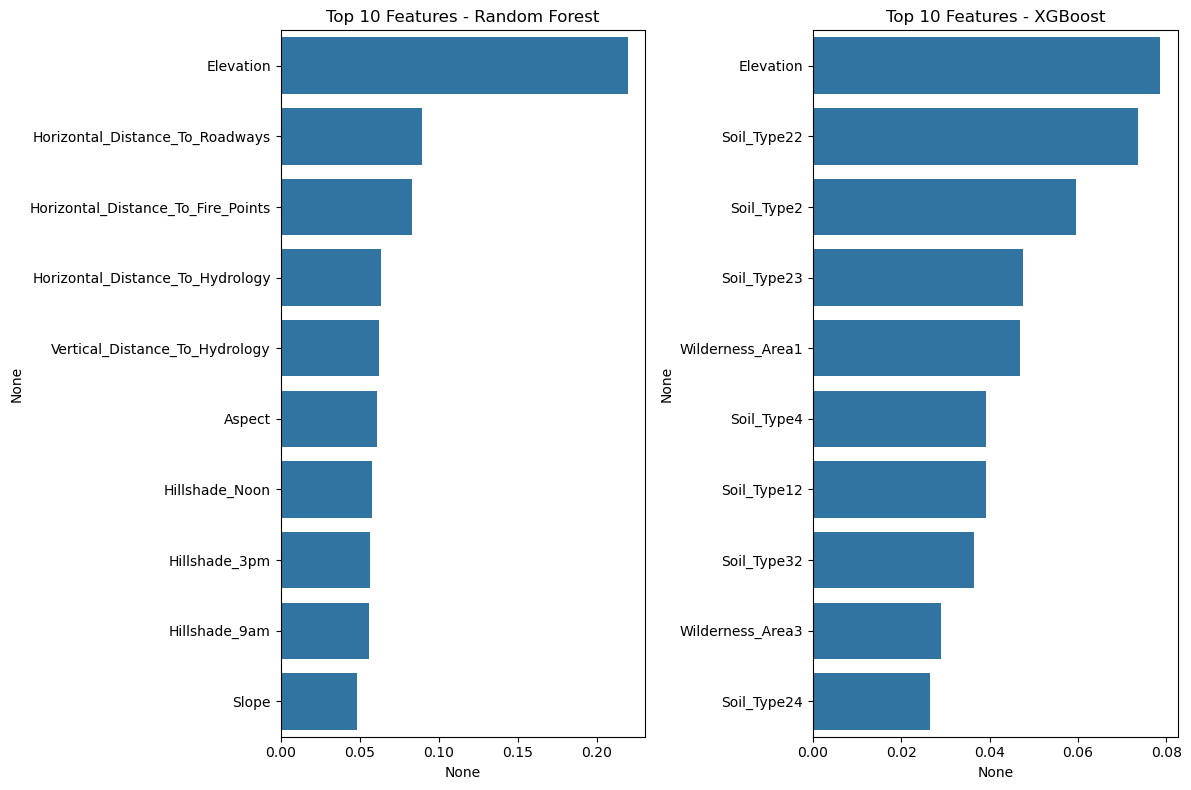

In [17]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

print("Checking required variables...")
print("y_test exists:", 'y_test' in locals())
print("y_pred_rf exists:", 'y_pred_rf' in locals())
print("y_pred_xgb exists:", 'y_pred_xgb' in locals())
print("feature_imp_rf exists:", 'feature_imp_rf' in locals())
print("feature_imp_xgb exists:", 'feature_imp_xgb' in locals())

print("\nModel Performance Comparison:")
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("XGBoost Accuracy:", accuracy_score(y_test_remapped, y_pred_xgb))  # Note: using remapped y_test

plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
sns.barplot(x=feature_imp_rf[:10], y=feature_imp_rf.index[:10])
plt.title('Top 10 Features - Random Forest')
plt.subplot(1,2,2)
sns.barplot(x=feature_imp_xgb[:10], y=feature_imp_xgb.index[:10])
plt.title('Top 10 Features - XGBoost')
plt.tight_layout()
plt.show()

In [ ]:
import warnings
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

warnings.filterwarnings('ignore', category=UserWarning) 

print("Checking required variables...")
print("X_train exists:", 'X_train' in locals())
print("y_train exists:", 'y_train' in locals())
print("X_test exists:", 'X_test' in locals())
print("y_test exists:", 'y_test' in locals())

y_train_fixed = y_train - 1
y_test_fixed = y_test - 1

print("\nUnique classes in y_train_fixed:", np.unique(y_train_fixed))
print("Unique classes in y_test_fixed:", np.unique(y_test_fixed))

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'class_weight': ['balanced']
}

grid_rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid_rf,
    cv=3,
    n_jobs=-1,
    scoring='accuracy',
    verbose=1
)
grid_rf.fit(X_train, y_train_fixed)

print("\nBest Random Forest Parameters:", grid_rf.best_params_)
print("Best Random Forest Accuracy:", grid_rf.best_score_)

param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

grid_xgb = GridSearchCV(
    XGBClassifier(
        random_state=42,
        use_label_encoder=False,
        eval_metric='mlogloss',
        objective='multi:softmax',
        num_class=len(np.unique(y_train_fixed))
    ),
    param_grid_xgb,
    cv=3,
    n_jobs=-1,
    scoring='accuracy',
    verbose=1
)
grid_xgb.fit(X_train, y_train_fixed)

print("\nBest XGBoost Parameters:", grid_xgb.best_params_)
print("Best XGBoost Accuracy:", grid_xgb.best_score_)

best_rf = grid_rf.best_estimator_
y_pred_rf_tuned = best_rf.predict(X_test)
print("\nTuned Random Forest Test Accuracy:", accuracy_score(y_test_fixed, y_pred_rf_tuned))
print("Classification Report:\n", classification_report(y_test_fixed, y_pred_rf_tuned))

best_xgb = grid_xgb.best_estimator_
y_pred_xgb_tuned = best_xgb.predict(X_test)
print("\nTuned XGBoost Test Accuracy:", accuracy_score(y_test_fixed, y_pred_xgb_tuned))
print("Classification Report:\n", classification_report(y_test_fixed, y_pred_xgb_tuned))

Checking required variables...
X_train exists: True
y_train exists: True
X_test exists: True
y_test exists: True

Unique classes in y_train_fixed: [0 1 2 3 4 5 6]
Unique classes in y_test_fixed: [0 1 2 3 4 5 6]
Fitting 3 folds for each of 36 candidates, totalling 108 fits

Best Random Forest Parameters: {'class_weight': 'balanced', 'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 300}
Best Random Forest Accuracy: 0.7830002768176088
Fitting 3 folds for each of 162 candidates, totalling 486 fits
